In [25]:
import sys 
sys.path.append("../../")

from crossbeam.abstraction.dreamcoder2lambdabeam import *
from crossbeam.abstraction.lambdabeam2dreamcoder import *
import torch
import re
from crossbeam.abstraction.utils import *
from collections import OrderedDict

In [2]:
from crossbeam.data.deepcoder.deepcoder_tasks import HANDWRITTEN_TASKS

In [5]:

import json
with open("/work/ldierkes/repos/new/LambdaBeam/outputs/beamstract/top/eval/results.json") as f:
    results = json.load(f)

In [6]:
results = results["results"]
success = []
weight = []
elapsed_time = []
num_unique_values = []
for sol in results:
    elapsed_time.append(sol["elapsed_time"])
    success.append(sol["success"])
    weight.append(sol["solution_weight"])    

In [9]:
len(success)

54

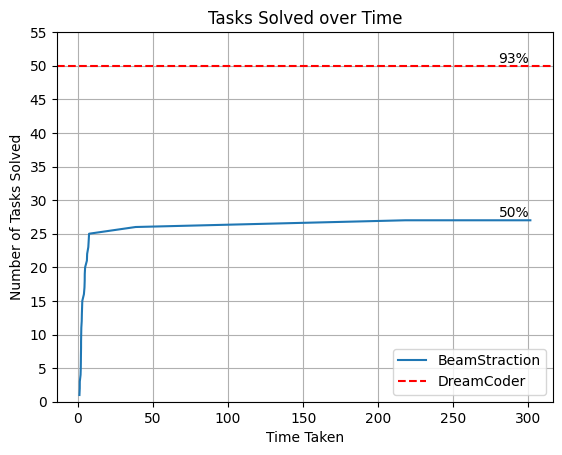

In [24]:
import matplotlib.pyplot as plt


# Sort the data based on time taken
sorted_data = sorted(zip(elapsed_time, success))

# Separate the sorted data back into separate lists
sorted_time_taken, sorted_tasks_solved = zip(*sorted_data)

# Calculate cumulative sum of tasks solved
cumulative_tasks = [sum(sorted_tasks_solved[:i+1]) for i in range(len(sorted_tasks_solved))]

# Plotting without markers and with legend for "BeamStraction"
plt.plot(sorted_time_taken, cumulative_tasks, linestyle='-', label='BeamStraction')
plt.axhline(y=50, color='r', linestyle='--', label='DreamCoder')

# Set y-axis maximum label to 54
plt.ylim(0, 54)
plt.yticks(range(0, 56, 5))
# Finding the time and tasks solved at the 50% success rate
halfway_index = int(0.5 * len(cumulative_tasks))
halfway_time = sorted_time_taken[halfway_index]
halfway_tasks = cumulative_tasks[halfway_index]

# Adding a text annotation for 50% success rate
plt.text(halfway_time, halfway_tasks, '50%', ha='right', va='bottom')
plt.text(300, 50, '93%', ha='right', va='bottom')

plt.xlabel('Time Taken')
plt.ylabel('Number of Tasks Solved')
plt.title('Tasks Solved over Time')
plt.legend()  # Display legend
plt.grid(True)
plt.show()


In [17]:
54 * 0.93


50.220000000000006

In [30]:
import torch
with open("/work/ldierkes/repos/new/LambdaBeam/outputs/beamstract/lambdabeam/top/model-latest.ckpt", "rb") as f:
    ckpt = torch.load(f)

In [31]:
for inv in ckpt["inventions"]:
    print(inv.program)

Count((lambda v1: Greater(x1, v1)), x2)
Reverse(Sort(x1))
Take(x2, Sort(x1))
Take(-1, x1)
Filter((lambda v1: Greater(v1, x1)), x2)
Drop(Subtract(0, x1), x2)
Reverse(x2(Sort(x1)))
Greater(x1, 0)
Greater(0, x1)
Take(Count((lambda v1: x3(v1)), x2), Sort(x1))


In [27]:
for inv in ckpt["inventions"]:
    if inv.name in {'fn_1', 'fn_11', 'fn_2', 'fn_26', 'fn_3', 'fn_4', 'fn_52', 'fn_6', 'fn_7'}:
        print(inv.program)

for const in ckpt["domain"].constants:
    if const != 1 and const != 0:
        print(const)

Cdr(Cdr(Cdr(x1)))
Map((lambda v1: If(Greater(1, v1), 1, 0)), x1)
Map((lambda v1: Mod(v1, x1)), x2)
Cons(Car(x1), x2)
Add(1, x1)
Cdr(Cdr(Cdr(Cdr(x1))))
Map((lambda v1: Subtract(v1, 1)), x1)
Map((lambda v1: x1(1, v1)), x2)
Map((lambda v1: Subtract(1, v1)), x1)
2
3
5


In [29]:
for inv in ckpt["inventions"]:
    if inv.name in {'fn_1', 'fn_11', 'fn_2', 'fn_26', 'fn_3', 'fn_4', 'fn_52', 'fn_6', 'fn_7'}:
        print(inv.name, inv.program)

fn_1 Cdr(Cdr(Cdr(x1)))
fn_2 Map((lambda v1: If(Greater(1, v1), 1, 0)), x1)
fn_3 Map((lambda v1: Mod(v1, x1)), x2)
fn_4 Cons(Car(x1), x2)
fn_6 Add(1, x1)
fn_7 Cdr(Cdr(Cdr(Cdr(x1))))
fn_11 Map((lambda v1: Subtract(v1, 1)), x1)
fn_26 Map((lambda v1: x1(1, v1)), x2)
fn_52 Map((lambda v1: Subtract(1, v1)), x1)


In [25]:
ckpt["domain"].constants

[0, 1, 2, 3, 5]

In [34]:
operations = []
for op in ckpt["domain"].operations:
    if "fn" in str(op):
        if str(op) in {'fn_1', 'fn_11', 'fn_2', 'fn_26', 'fn_3', 'fn_4', 'fn_52', 'fn_6', 'fn_7'}:
            operations.append(op)
    else:
        operations.append(op)


In [35]:
operations

[Add,
 Subtract,
 Multiply,
 Greater,
 Mod,
 Equal,
 IsEmpty,
 IsSquare,
 IsPrime,
 If,
 Cdr,
 Car,
 Length,
 Cons,
 Index,
 Map,
 Fold,
 fn_1,
 fn_2,
 fn_3,
 fn_4,
 fn_6,
 fn_7,
 fn_11,
 fn_26,
 fn_52]

In [3]:
import torch
with open("/work/ldierkes/repos/new/LambdaBeam/outputs/beamstract/top/model-latest.ckpt", "rb") as f:
    ckpt = torch.load(f)

for inv in ckpt["inventions"]:
    print(inv.name, inv.program)

fn_1 Cdr(Cdr(Cdr(x1)))
fn_2 Map((lambda v1: If(Greater(1, v1), 1, 0)), x1)
fn_3 Map((lambda v1: Mod(v1, x1)), x2)
fn_4 Cons(Car(x1), x2)
fn_6 Add(1, x1)
fn_7 Cdr(Cdr(Cdr(Cdr(x1))))
fn_8 Cons(Car(x1(x2)), x3)
fn_9 x2(Add(x1, 3), x3)
fn_11 Map((lambda v1: Subtract(v1, 1)), x1)
fn_14 Map((lambda v1: 0), x1)
fn_21 fn_2(fn_3(x1, x2))
fn_23 fn_1(Cons(0, x1))
fn_24 fn_3(x2, Map((lambda v1: x1(v1)), x3))
fn_26 Map((lambda v1: x1(1, v1)), x2)
fn_27 fn_4(x1(x2), fn_1(fn_1(fn_7(x1(x2)))))
fn_28 Map((lambda v1: If(IsEmpty(x3), 2, x1)), x2)
fn_31 fn_3(x1, fn_11(x2))
fn_36 fn_4(x2, fn_1(x1))
fn_38 x2(x2(fn_11(x1)))
fn_39 fn_3(x2, fn_11(fn_11(x1)))
fn_44 fn_3(x1, fn_11(fn_11(fn_11(x2))))
fn_50 fn_4(Cdr(x1), fn_1(x3(x3(x2))))
fn_51 fn_8((lambda v1: Map((lambda u1: x3(u1)), x2)), (lambda v1: x1(v1)), x1)
fn_52 Map((lambda v1: Subtract(1, v1)), x1)
fn_53 fn_3(x1, fn_26((lambda v1: (lambda u1: fn_6(v1))), x2))
fn_54 fn_3(5, fn_11(x1))
fn_60 fn_7(fn_1(x1))
fn_61 fn_4(x2, fn_1(x1(x2)))
fn_62 fn_8((lambda v

In [46]:
import json
import ast
with open("/work/ldierkes/repos/new/LambdaBeam/outputs/beamstract/top/results.json", "r") as f:
    json_dict = json.load(f)
task_string = json_dict["results"][0]["task"]

task_ast = ast.parse(task_string)

# Extract the task name from the AST
task_name = None
for node in ast.walk(task_ast):
    if isinstance(node, ast.keyword) and node.arg == 'name':
        task_name = node.value.s

# Print the result
print("Task Name:", task_name)

Task Name: caesar-cipher-k-modulo-n with k=5 and n=2


In [4]:
import pickle
with open("/work/ldierkes/repos/new/LambdaBeam/crossbeam/data/dreamcoder_test_tasks.pkl", 'rb') as file:
        original_tasks = pickle.load(file)

In [6]:
len(original_tasks)

54

In [55]:
frontiers = {}
top_k = 2
for solution in json_dict["results"]:
    if solution['solution'] != None:
        task_string = solution["task"]

        task_ast = ast.parse(task_string)

        # Extract the task name from the AST
        task_name = None
        for node in ast.walk(task_ast):
            if isinstance(node, ast.keyword) and node.arg == 'name':
                task_name = node.value.s

        if task_name not in frontiers.keys():
            frontiers[task_name] = [(solution['solution'], solution["solution_weight"])]
        elif len(frontiers[task_name]) < top_k:
            frontiers[task_name].append((solution['solution'], solution["solution_weight"]))
        else:
            max_weight = max([x[1] for x in frontiers[task_name]])
            if solution["solution_weight"] < max_weight:
                max_index = [x[1] for x in frontiers[task_name]].index(max_weight)
                frontiers[task_name][max_index] = (solution['solution'], solution["solution_weight"])

In [28]:
for inv in ckpt["inventions"]:
    print(inv.name, inv.program)

fn_1 Cdr(Cdr(Cdr(x1)))
fn_2 Map((lambda v1: If(Greater(1, v1), 1, 0)), x1)
fn_3 Map((lambda v1: Mod(v1, x1)), x2)
fn_4 Cons(Car(x1), x2)
fn_6 Add(1, x1)
fn_7 Cdr(Cdr(Cdr(Cdr(x1))))
fn_8 Cons(Car(x1(x2)), x3)
fn_9 x2(Add(x1, 3), x3)
fn_11 Map((lambda v1: Subtract(v1, 1)), x1)
fn_14 Map((lambda v1: 0), x1)
fn_21 fn_2(fn_3(x1, x2))
fn_23 fn_1(Cons(0, x1))
fn_24 fn_3(x2, Map((lambda v1: x1(v1)), x3))
fn_26 Map((lambda v1: x1(1, v1)), x2)
fn_27 fn_4(x1(x2), fn_1(fn_1(fn_7(x1(x2)))))
fn_28 Map((lambda v1: If(IsEmpty(x3), 2, x1)), x2)
fn_31 fn_3(x1, fn_11(x2))
fn_36 fn_4(x2, fn_1(x1))
fn_38 x2(x2(fn_11(x1)))
fn_39 fn_3(x2, fn_11(fn_11(x1)))
fn_44 fn_3(x1, fn_11(fn_11(fn_11(x2))))
fn_50 fn_4(Cdr(x1), fn_1(x3(x3(x2))))
fn_51 fn_8((lambda v1: Map((lambda u1: x3(u1)), x2)), (lambda v1: x1(v1)), x1)
fn_52 Map((lambda v1: Subtract(1, v1)), x1)
fn_53 fn_3(x1, fn_26((lambda v1: (lambda u1: fn_6(v1))), x2))
fn_54 fn_3(5, fn_11(x1))
fn_60 fn_7(fn_1(x1))
fn_61 fn_4(x2, fn_1(x1(x2)))
fn_62 fn_8((lambda v

In [3]:
# load pickle
import pickle
import os

with open("/work/ldierkes/repos/new/LambdaBeam/outputs/beamstract/top/data/train-weight-8-00068.pkl", "rb") as f:
    data = pickle.load(f)

In [28]:
for inv in ckpt["inventions"]:
    print(inv.name, inv.program)

fn_1 Cdr(Cdr(Cdr(x1)))
fn_2 Map((lambda v1: If(Greater(1, v1), 1, 0)), x1)
fn_3 Map((lambda v1: Mod(v1, x1)), x2)
fn_4 Cons(Car(x1), x2)
fn_6 Add(1, x1)
fn_7 Cdr(Cdr(Cdr(Cdr(x1))))
fn_8 Cons(Car(x1(x2)), x3)
fn_9 x2(Add(x1, 3), x3)
fn_11 Map((lambda v1: Subtract(v1, 1)), x1)
fn_14 Map((lambda v1: 0), x1)
fn_21 fn_2(fn_3(x1, x2))
fn_23 fn_1(Cons(0, x1))
fn_24 fn_3(x2, Map((lambda v1: x1(v1)), x3))
fn_26 Map((lambda v1: x1(1, v1)), x2)
fn_27 fn_4(x1(x2), fn_1(fn_1(fn_7(x1(x2)))))
fn_28 Map((lambda v1: If(IsEmpty(x3), 2, x1)), x2)
fn_31 fn_3(x1, fn_11(x2))
fn_36 fn_4(x2, fn_1(x1))
fn_38 x2(x2(fn_11(x1)))
fn_39 fn_3(x2, fn_11(fn_11(x1)))
fn_44 fn_3(x1, fn_11(fn_11(fn_11(x2))))
fn_50 fn_4(Cdr(x1), fn_1(x3(x3(x2))))
fn_51 fn_8((lambda v1: Map((lambda u1: x3(u1)), x2)), (lambda v1: x1(v1)), x1)
fn_52 Map((lambda v1: Subtract(1, v1)), x1)
fn_53 fn_3(x1, fn_26((lambda v1: (lambda u1: fn_6(v1))), x2))
fn_54 fn_3(5, fn_11(x1))
fn_60 fn_7(fn_1(x1))
fn_61 fn_4(x2, fn_1(x1(x2)))
fn_62 fn_8((lambda v